# Знакомство с `torch.Tensor`

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/torch.html


## Задачи для совместного разбора

In [ ]:
import torch as th

In [ ]:
torch.__version__

'2.0.1+cu118'

In [ ]:
!python --version

Python 3.10.12


1\. Создайте тензор и исследуйте его основные характеристики

In [ ]:
t = th.randint(0, 11, size=(10, ), dtype=th.float32)
t

tensor([ 4., 10.,  4.,  3.,  3.,  1.,  2.,  9.,  3.,  4.])

In [ ]:
t.dtype

torch.int64

In [ ]:
# th.randint(0, 11, size=(10, )).to(dtype=th.float32)
th.randint(0, 11, size=(10, )).long() # .to(dtype=th.int64)

tensor([ 1,  2,  7,  9,  0,  2,  9,  6,  2, 10])

In [ ]:
t = th.randint(0, 11, size=(10, 5, 5), dtype=th.float32)

In [ ]:
t.size()

torch.Size([10, 5, 5])

In [ ]:
t.shape

torch.Size([10, 5, 5])

2\. Создайте трехмерный тензор и рассмотрите основные способы индексирования по нему

In [ ]:
t = th.randint(0, 11, size=(10, 5, 5), dtype=th.float32)

In [ ]:
t[0, 0, 0].item()

7.0

In [ ]:
t[0, 0, [False, True, False, False, True]]

tensor([8., 9.])

In [ ]:
t[0, 0, th.arange(5) % 2 == 0]

tensor([7., 5., 9.])

In [ ]:
t[0, 0, [0, 3, 2, 0, 3, 4, 2, 1,]]

tensor([7., 0., 5., 7., 0., 9., 5., 8.])

In [ ]:
t[0, 0, :] = 9999

In [ ]:
t

tensor([[[9.9990e+03, 9.9990e+03, 9.9990e+03, 9.9990e+03, 9.9990e+03],
         [7.0000e+00, 2.0000e+00, 1.0000e+00, 5.0000e+00, 6.0000e+00],
         [2.0000e+00, 1.0000e+01, 1.0000e+01, 0.0000e+00, 4.0000e+00],
         [1.0000e+01, 3.0000e+00, 0.0000e+00, 1.0000e+00, 6.0000e+00],
         [4.0000e+00, 8.0000e+00, 1.0000e+01, 7.0000e+00, 2.0000e+00]],

        [[5.0000e+00, 4.0000e+00, 8.0000e+00, 3.0000e+00, 0.0000e+00],
         [4.0000e+00, 1.0000e+01, 4.0000e+00, 4.0000e+00, 5.0000e+00],
         [1.0000e+01, 1.0000e+00, 1.0000e+01, 2.0000e+00, 6.0000e+00],
         [7.0000e+00, 1.0000e+00, 1.0000e+01, 6.0000e+00, 7.0000e+00],
         [1.0000e+01, 8.0000e+00, 2.0000e+00, 9.0000e+00, 7.0000e+00]],

        [[3.0000e+00, 1.0000e+01, 4.0000e+00, 3.0000e+00, 6.0000e+00],
         [1.0000e+00, 1.0000e+00, 6.0000e+00, 8.0000e+00, 5.0000e+00],
         [9.0000e+00, 9.0000e+00, 5.0000e+00, 1.0000e+01, 0.0000e+00],
         [6.0000e+00, 7.0000e+00, 1.0000e+01, 1.0000e+01, 1.0000e+00],
  

3\. Создайте тензор (4х4) и модифицируйте следующим образом: ко всем четным столбцам прибавьте 1, из нечетных вычтите 1.

In [ ]:
t = th.randint(0, 11, size=(5, 5), dtype=th.float32)
t

tensor([[ 9.,  9., 10.,  7.,  6.],
        [ 5.,  0.,  7.,  7.,  1.],
        [10.,  6.,  8.,  7.,  5.],
        [ 0.,  8.,  9.,  9.,  8.],
        [ 8.,  5.,  6.,  5.,  5.]])

In [ ]:
t2 = th.ones(5)
t2

In [ ]:
t + 123

In [ ]:
t + t2

tensor([[10., 10., 11.,  8.,  7.],
        [ 6.,  1.,  8.,  8.,  2.],
        [11.,  7.,  9.,  8.,  6.],
        [ 1.,  9., 10., 10.,  9.],
        [ 9.,  6.,  7.,  6.,  6.]])

In [ ]:
t.shape, t2.shape

(torch.Size([5, 5]), torch.Size([5]))

4\. Исследуйте совместимость `torch` с `numpy` и `sklearn`

In [ ]:
import numpy as np

In [ ]:
# np.sin(t)
th.sin(t)

tensor([[ 0.4121,  0.4121, -0.5440,  0.6570, -0.2794],
        [-0.9589,  0.0000,  0.6570,  0.6570,  0.8415],
        [-0.5440, -0.2794,  0.9894,  0.6570, -0.9589],
        [ 0.0000,  0.9894,  0.4121,  0.4121,  0.9894],
        [ 0.9894, -0.9589, -0.2794, -0.9589, -0.9589]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
MinMaxScaler().fit_transform(t)

array([[0.9       , 1.        , 1.        , 0.5       , 0.71428571],
       [0.5       , 0.        , 0.25      , 0.5       , 0.        ],
       [1.        , 0.66666667, 0.5       , 0.5       , 0.57142857],
       [0.        , 0.88888889, 0.75      , 1.        , 1.        ],
       [0.8       , 0.55555556, 0.        , 0.        , 0.57142857]])

In [ ]:
import torch as th

In [ ]:
th.cuda.is_available()

True

In [ ]:
t = th.randint(0, 11, size=(5, 5), dtype=th.float32)

In [ ]:
t_gpu = t.to(device="cuda")

tensor([[ 3.,  5.,  0.,  1.,  0.],
        [ 0.,  1.,  0.,  0.,  8.],
        [10.,  5.,  7.,  8.,  2.],
        [ 1.,  7.,  7.,  5.,  0.],
        [ 6.,  1., 10.,  9.,  1.]], device='cuda:0')

In [ ]:
t.cuda()

tensor([[ 3.,  5.,  0.,  1.,  0.],
        [ 0.,  1.,  0.,  0.,  8.],
        [10.,  5.,  7.,  8.,  2.],
        [ 1.,  7.,  7.,  5.,  0.],
        [ 6.,  1., 10.,  9.,  1.]], device='cuda:0')

In [ ]:
th.tensor([i for i in range(5)])

tensor([0, 1, 2, 3, 4])

In [ ]:
th.arange(5)

tensor([0, 1, 2, 3, 4])

## Задачи для самостоятельного решения

In [ ]:
import torch as th
import matplotlib.pyplot as plt

<p class="task" id="1"></p>

### 1
Создайте двумерный тензор размера (100000, 10), заполненный нулями. Используя прихотливое индексирование, поставьте в каждой строке тензора ровно одну единицу в случайно выбранном столбце. Рассчитайте и выведите на экран вероятности $p_i$ того, что для случайно выбранной строки в столбце $i$ будет стоять единица.

In [ ]:
tensor = th.zeros(100000, 10)
tensor[th.arange(tensor.size()[0]), th.randint(0, 10, (tensor.size()[0],))] = 1
th.mean(tensor, dim=0)

tensor([0.1010, 0.1013, 0.0997, 0.0985, 0.1016, 0.0976, 0.1003, 0.1001, 0.0981,
        0.1016])

<p class="task" id="2"></p>

### 2
При помощи прихотливого индексирования для двумерного тензора размерности (10, 10), состоящего из случайных целых чисел в пределах от 0 до 10, получите тензор элементов, находящихся сразу над побочной диагональю.

In [ ]:
tensor = th.randint(0, 11, size=(10, 10))
tensor

tensor([[ 7,  1,  4,  0, 10,  1,  1,  8,  5,  7],
        [ 8,  1,  3,  4,  0,  6,  6,  1,  1,  6],
        [ 6,  7, 10,  0,  7,  0, 10,  6,  8,  9],
        [ 2,  8,  4, 10,  8,  9,  2, 10,  4,  2],
        [ 7,  3,  4, 10,  1,  1,  9, 10,  2,  3],
        [ 8,  8, 10,  9,  1,  4,  6,  4,  2,  1],
        [10,  2,  0,  8,  3,  3,  8,  4,  0,  4],
        [ 1,  3,  5,  4,  5,  3,  5,  0,  1,  5],
        [ 6,  7,  6,  2,  6,  2,  9, 10,  4,  4],
        [ 2,  1,  3,  0,  6,  8,  2,  8,  7,  9]])

In [ ]:
indices = (th.arange(10)[:, None] + th.arange(10)) == 8
result = tensor[indices]
result

tensor([ 5,  1, 10,  9,  1,  9,  0,  3,  6])

<p class="task" id="3"></p>

### 3
Создайте двумерный тензор $t$ размерности (5, 5), состоящий из случайных чисел в пределах от 0 до 100. Обнулить все значения в массиве, расположенные вне квадрата размера 2х2 вокруг максимального элемента. Если максимумов несколько, обнулите элементы около любого из них.

<p class="task" id="4"></p>

### 4
Создайте трехмерный массив размерности (2, 5, 5) на основе решения задачи 3 (объедините исходный и результирущий тензор вдоль нулевой оси). Сохраните полученный трехмерный тензор в файл `tensor.pt`. Загрузите полученный тензор и покажите, что все элементы двух тензоров совпадают.

<p class="task" id="5"></p>

### 5
Создайте четырехмерный массив `t` размерности (2, 3, 5, 5), заполненный случайными целыми числами от 1 до 10 (сами значения должны быть представлены типом float32). Рассчитайте среднее значение для каждого двумерного тензора `t[i, j, :, :]`. Представьте результат в виде трехмерного тензора размера (2, 3, 1).

In [ ]:
tensor = th.randint(1, 11, size=(2, 3, 4, 4), dtype=th.float32)
tensor

tensor([[[[ 3., 10.,  8.,  3.],
          [ 3.,  2.,  5.,  2.],
          [ 2.,  3.,  9.,  7.],
          [ 5.,  7.,  3.,  6.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  2.,  9.,  2.],
          [ 5.,  9.,  9.,  4.],
          [ 6.,  8., 10.,  3.]],

         [[10.,  7.,  5.,  3.],
          [ 4.,  1.,  4.,  8.],
          [ 4.,  7.,  6.,  4.],
          [ 3.,  1.,  2.,  7.]]],


        [[[ 3.,  5.,  7.,  8.],
          [ 6.,  5.,  9.,  3.],
          [ 1.,  4.,  2.,  9.],
          [ 4.,  7.,  4.,  7.]],

         [[ 9.,  5.,  7.,  8.],
          [ 4.,  6.,  1.,  8.],
          [ 5.,  6.,  7.,  2.],
          [ 1.,  1.,  9.,  8.]],

         [[ 2., 10.,  7.,  4.],
          [ 1.,  1.,  1.,  2.],
          [ 9.,  9.,  6.,  9.],
          [ 4.,  5.,  4.,  3.]]]])

In [ ]:
mean = tensor.mean(dim=(2, 3)).unsqueeze(-1)
mean

tensor([[[4.8750],
         [5.1250],
         [4.7500]],

        [[5.2500],
         [5.4375],
         [4.8125]]])

<p class="task" id="6"></p>

### 6
Создайте одномерный тензор размера `N=100_000_000`, заполненный числами из экспоненциального распредления с параметром $\lambda=5$. Рассчитайте значения для построения гистограммы при помощи пакета `torch`. Визуализируйте гистограмму. Проверьте возможность использования GPU. При наличии GPU перенесите созданный тензор в память GPU, повторите вычисления. Сравните время расчетом с и без использования GPU.

In [ ]:
tensor = th.empty(100000000).exponential_(1 / 5)

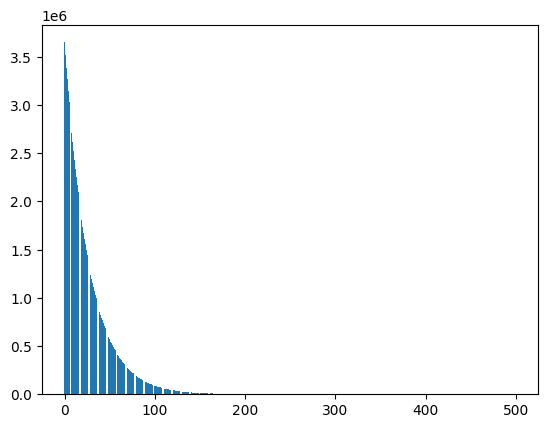

CPU times: user 2.25 s, sys: 115 ms, total: 2.36 s
Wall time: 4.16 s


In [ ]:
# CPU
%%time
hist1 = th.histc(tensor, bins=500)
plt.bar(range(500), hist1)
plt.show()

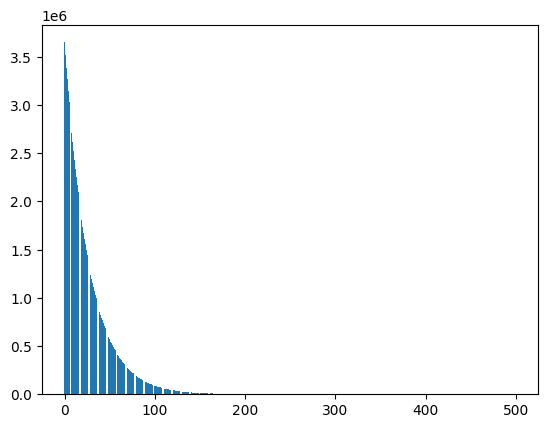

CPU times: user 826 ms, sys: 107 ms, total: 933 ms
Wall time: 808 ms


In [ ]:
# GPU
%%time
hist2 = th.histc(tensor.to(device="cuda"), bins=500).to("cpu")
plt.bar(range(500), hist2)
plt.show()

In [ ]:
# Использование GPU сократило время выполнения в 5 раз

<p class="task" id="7"></p>

### 7
Создайте четырехмерный тензор размера (10, 6, 6, 3), заполненный случайными целыми числами от 0 до 255. Считая, что данный тензор представляет собой батч из 10 картинок размера 6х6 в формате RGB, измените тензор следующим образом. Для оттенков красного обнулите все столбцы, кроме первых двух; для оттенков зеленого обнулите столбцы со второго по четвертый; для оттенков синего обнулите пятый и шестой столбцы. Для выполнения задания используйте механизм распространения.

In [ ]:
tensor = th.randint(0, 256, size=(10, 6, 6, 3), dtype=th.int32)
r = th.ones(6, dtype=th.int32)
g = th.ones(6, dtype=th.int32)
b = th.ones(6, dtype=th.int32)
r[2:] = 0
g[1:4] = 0
b[-2:] = 0
tensor[:, :, :, 0] *= r
tensor[:, :, :, 1] *= g
tensor[:, :, :, 2] *= b
tensor

tensor([[[[ 80, 178,  96],
          [158,   0,  65],
          [  0,   0,  88],
          [  0,   0, 128],
          [  0,  39,   0],
          [  0, 162,   0]],

         [[ 60, 229,  32],
          [ 99,   0, 238],
          [  0,   0, 179],
          [  0,   0, 114],
          [  0,  77,   0],
          [  0, 160,   0]],

         [[173, 186, 229],
          [ 97,   0, 104],
          [  0,   0, 172],
          [  0,   0, 158],
          [  0,  96,   0],
          [  0,  53,   0]],

         [[172,  59, 196],
          [179,   0,  42],
          [  0,   0,  43],
          [  0,   0, 164],
          [  0, 116,   0],
          [  0,  45,   0]],

         [[102, 116, 103],
          [ 85,   0,  23],
          [  0,   0,  16],
          [  0,   0, 136],
          [  0,  76,   0],
          [  0, 138,   0]],

         [[226, 242, 150],
          [181,   0, 205],
          [  0,   0,  36],
          [  0,   0,  23],
          [  0, 200,   0],
          [  0,   0,   0]]],


        [[[ 37

## Обратная связь
- [ ] Хочу получить обратную связь по решению